In [94]:
import torch

torch.__version__

'2.6.0+cu118'

C:\Users\Dell\AppData\Local\Temp\ipykernel_6204\4292162611.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


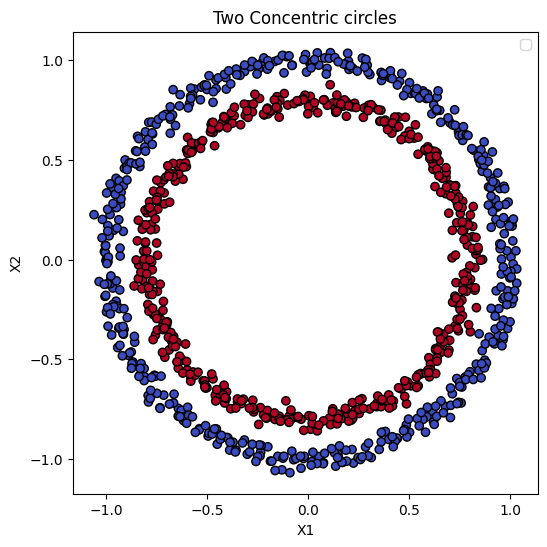

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X,y = make_circles(1000,noise=0.03,random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap="coolwarm",
            edgecolors="k")
plt.title("Two Concentric circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

In [96]:
import pandas as pd

data = pd.DataFrame({"X1":X[:,0]
                     ,"X2":X[:,1],
                     "label":y})

data.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [97]:
def accuracy_fn(y_true,y_pred):
    y_true = y_true.long()
    y_pred = y_pred.long()
    correct = torch.eq(y_true,y_pred).sum().item()
    total = len(y_pred)
    acc = (correct/total)*100
    return acc

In [98]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train,x_test = train_test_split(X,test_size=0.2,random_state=42)
y_train,y_test = train_test_split(y,test_size=0.2,random_state=42)

len(x_train),len(y_train),len(x_test),len(y_test)

(800, 800, 200, 200)

In [99]:
from torch import nn

class classification_of_non_linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=10)
        self.layer2 = nn.Linear(in_features=10,out_features = 10)
        self.layer3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU() # Non Linear activation function

    def forward(self,x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [100]:
model_3 = classification_of_non_linear()
model_3

classification_of_non_linear(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [101]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0865, -0.2525],
                      [ 0.3024,  0.3285],
                      [ 0.2549,  0.1784],
                      [ 0.7052, -0.2960],
                      [ 0.1702,  0.2005],
                      [ 0.1555,  0.5652],
                      [-0.6713, -0.4190],
                      [-0.6453,  0.2728],
                      [-0.5929, -0.3379],
                      [ 0.0114,  0.2197]])),
             ('layer1.bias',
              tensor([ 0.4877,  0.4240, -0.6632,  0.0809, -0.0164,  0.6893, -0.5610,  0.6662,
                       0.2801,  0.3338])),
             ('layer2.weight',
              tensor([[-1.9951e-02,  9.0707e-02,  1.4367e-01, -5.7549e-02,  9.2752e-02,
                       -3.2075e-02, -2.5965e-01,  1.9192e-01, -1.6696e-01,  1.1298e-01],
                      [-2.3838e-01,  1.8934e-01,  1.9718e-01,  1.1591e-02,  3.9529e-02,
                       -2.0112e-01, -2.4772e-01, -5.2571e-02,  9.8567e-02,  1.7248e-

In [102]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),lr =0.1)

In [103]:
with torch.inference_mode():
    
    y_logits = model_3(x_test)

y_logits,y_logits.shape



(tensor([[0.1462],
         [0.1403],
         [0.1545],
         [0.1398],
         [0.0892],
         [0.1029],
         [0.1462],
         [0.1456],
         [0.1570],
         [0.1401],
         [0.1460],
         [0.1422],
         [0.1486],
         [0.1304],
         [0.1641],
         [0.1350],
         [0.1446],
         [0.1545],
         [0.1564],
         [0.1682],
         [0.1400],
         [0.1266],
         [0.1632],
         [0.1637],
         [0.1447],
         [0.1494],
         [0.0924],
         [0.1087],
         [0.1660],
         [0.1221],
         [0.1487],
         [0.1441],
         [0.1430],
         [0.0903],
         [0.1452],
         [0.1421],
         [0.1411],
         [0.1369],
         [0.0982],
         [0.1259],
         [0.1659],
         [0.1704],
         [0.1450],
         [0.0789],
         [0.1418],
         [0.1421],
         [0.0884],
         [0.1396],
         [0.1426],
         [0.0974],
         [0.1399],
         [0.1407],
         [0.

In [104]:
x_train.shape

torch.Size([800, 2])

In [108]:

epochs = 1000

for epoch in range(epochs):
    
    model_3.train()

    y_logits = model_3(x_train).squeeze()

    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train)

    acc = accuracy_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()

    with torch.inference_mode():
        y_test_logits = model_3(x_test).squeeze()

        y_test_pred = torch.round(torch.sigmoid(y_test_logits))

        test_loss = loss_fn(y_test_logits,y_test)
    
    test_acc  = accuracy_fn(y_test_pred,y_test)

    if epoch%10 == 0:
        print(f"epoch:{epoch} | loss:{loss} | accuracy:{acc} | test loss:{test_loss} | test accuracy:{test_acc}")

model_3.state_dict()

epoch:0 | loss:0.5923835039138794 | accuracy:82.875 | test loss:0.613686203956604 | test accuracy:77.5
epoch:10 | loss:0.5880104899406433 | accuracy:84.25 | test loss:0.6099318265914917 | test accuracy:79.0
epoch:20 | loss:0.5834993720054626 | accuracy:84.75 | test loss:0.6060613393783569 | test accuracy:79.5
epoch:30 | loss:0.5788182616233826 | accuracy:85.75 | test loss:0.6018772721290588 | test accuracy:80.0
epoch:40 | loss:0.5739310383796692 | accuracy:87.0 | test loss:0.5975536108016968 | test accuracy:79.5
epoch:50 | loss:0.5688304305076599 | accuracy:88.625 | test loss:0.593083918094635 | test accuracy:81.5
epoch:60 | loss:0.5635401606559753 | accuracy:89.875 | test loss:0.588381826877594 | test accuracy:83.5
epoch:70 | loss:0.5580661296844482 | accuracy:90.875 | test loss:0.5834020972251892 | test accuracy:86.0
epoch:80 | loss:0.5523736476898193 | accuracy:91.875 | test loss:0.5783330202102661 | test accuracy:87.5
epoch:90 | loss:0.5464478731155396 | accuracy:92.625 | test loss

OrderedDict([('layer1.weight',
              tensor([[ 0.0065, -2.0875],
                      [ 0.4188,  0.8403],
                      [ 0.2549,  0.1784],
                      [ 2.2888, -1.4328],
                      [ 0.9206,  0.8781],
                      [-0.0151,  1.4835],
                      [-1.7151, -1.5010],
                      [-1.2244,  0.8272],
                      [-2.4285, -0.3262],
                      [ 0.4492,  0.3075]])),
             ('layer1.bias',
              tensor([ 2.1092,  0.9414, -0.6632,  0.1210, -0.1872,  1.4724, -0.2485,  1.4869,
                      -0.1779,  0.5171])),
             ('layer2.weight',
              tensor([[ 1.5934e+00,  3.8711e-01,  1.4367e-01, -1.1805e+00, -5.9632e-01,
                        1.8976e-01, -1.3451e+00,  5.2634e-01, -1.4338e+00,  3.1392e-01],
                      [-1.4186e+00,  7.2058e-01,  1.9718e-01,  9.1348e-01,  6.8137e-01,
                        6.0918e-01, -7.4215e-02, -5.8992e-02,  5.8294e-01,  3.8926e-

In [109]:
from helper_functions import plot_decision_boundary,plot_predictions

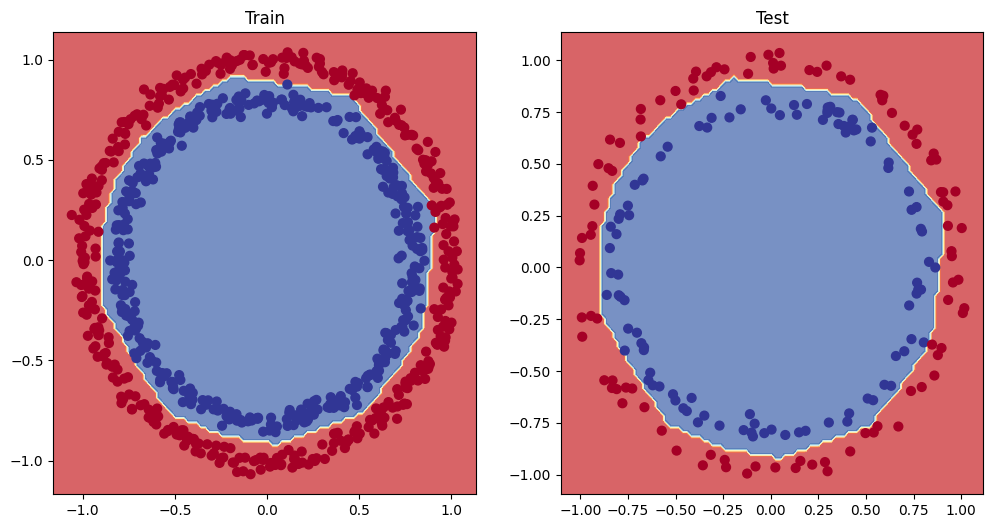

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_3,X=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,x_test,y_test)